<a href="https://colab.research.google.com/github/ArthurAllioux/MLTP2/blob/main/lab2_Feature_engineering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img style="float: left; padding-right: 10px; width: 45px" src="https://upload.wikimedia.org/wikipedia/fr/b/b1/Logo_EPF.png?raw=true"> 

# Introduction to Machine Learning
**P2022: Data engineering**<br>


## Lab 2:  Feature engineering

### First name:
### Last name:
### Group:


---

**Challenge definition**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Taff 5A/titanic.csv', sep = ',')
df.set_index('PassengerId', inplace = True, drop = True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### **Overview of the data**
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The dataset has some null values that we will need to deal with.

**First model: Quick and dirty**

A very important point in Machine Learning and Data Science is to rapidly build a first model that can serve as baseline. 

With the first model in place, then we can appreciate adding new features and use new algorithm and see effects on performances.

We can see that at least `Fare`, `SibSp` and `Parch` are immidiately usable for modelling. In fact they are int/float and they don't have null values.

In [ ]:
def parse_model_0(X: pd.DataFrame) -> (pd.DataFrame, pd.Series):
  target = X.Survived
  X = X[['Fare', 'SibSp', 'Parch']]
  return X, target

In [ ]:
X, y = parse_model_0(df.copy())

In [ ]:
X.head(10)

,Fare,SibSp,Parch
PassengerId,,,
1,7.2500,1,0
2,71.2833,1,0
3,7.9250,0,0
4,53.1000,1,0
5,8.0500,0,0
6,8.4583,0,0
7,51.8625,0,0
8,21.0750,3,1
9,11.1333,0,2


At this stage we need a way to asses model's performance. We will use this function which does a `cross validation`, we will see in details how we validate models in the next lecture, let's just this method for the moment.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

def compute_score(clf, X: pd.DataFrame, y: pd.Series) -> float:
  xval = cross_val_score(clf, X, y, cv = 10)
  return np.mean(xval)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
compute_score(logisticRegression, X, y)

0.6757178526841449

## **Feature engineering** 

**Exploratory data analysis: EDA**

EDA is a very important step to detect good features to add to a machine learning model. We will implement a method to plot feature distribution and we will do a simple EDA on a variable.

You can re-use this method for the open ended part of the lab.

In [ ]:
# split data survived and not survived
survived = df[df.Survived == 1]
dead = df[df.Survived == 0]

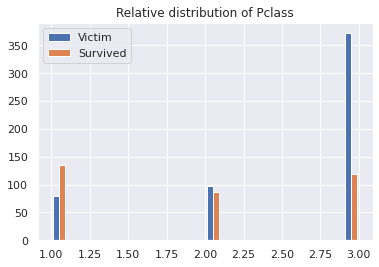

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# observe distribution of variables of these two populations
def plot_hist(feature, bins = 20):
  x1 = np.array(dead[feature].dropna())
  x2 = np.array(survived[feature].dropna())
  plt.hist([x1, x2], label = ['Victim', 'Survived'], bins = bins)
  plt.legend(loc = 'upper left')
  plt.title('Relative distribution of {}'.format(feature))
  plt.show()

# exemple on Pclass
plot_hist('Pclass')

**Question :** What conclusions can you draw from this graph ?

**Answer here** : It seems like being a class 3 passenger makes you more likely to die from the crash

In [ ]:
# let's use this new variable in the model
def parse_model_1(X):
  target = X.Survived
  class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
  X = X.join(class_dummies)
  to_delete = ['Name', 'Age', 'Sex', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Pclass']
  for column in to_delete:
    del X[column]
  return X, target

In [ ]:
X, y = parse_model_1(df.copy())
X.head(10)

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,
1,1,0,7.2500,0,0,1
2,1,0,71.2833,1,0,0
3,0,0,7.9250,0,0,1
4,1,0,53.1000,1,0,0
5,0,0,8.0500,0,0,1
6,0,0,8.4583,0,0,1
7,0,0,51.8625,1,0,0
8,3,1,21.0750,0,0,1
9,0,2,11.1333,0,0,1


In [ ]:
logisticRegression = LogisticRegression()
compute_score(logisticRegression, X, y)

0.6959425717852683

**Weights of each feature**

In [ ]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X, y)
print(logisticRegression.coef_)

[[-0.15072925  0.23372253  0.00675618  0.37803728  0.10814039 -0.84382307]]


Let's implement a method to plot feature weights in case of Logistic Regression

{
  "SibSp": -0.1507292521659343,
  "Parch": 0.2337225258372556,
  "Fare": 0.00675617705461451,
  "Pclass_1": 0.3780372753156653,
  "Pclass_2": 0.10814038815182453,
  "Pclass_3": -0.8438230719721483
}


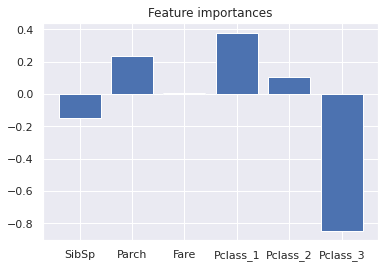

In [ ]:
import json

def plot_var_weights_logistic_regression(X, y):
  lr = LogisticRegression()
  lr.fit(X, y)

  columns = np.array(X.columns)
  weights = np.array(lr.coef_[0])

  # weights dictonary sorted by absolute value
  weights_dict = dict(zip(columns, weights))
  print(json.dumps(weights_dict, indent = 2))

  # plot the weights
  plt.bar(columns, weights)
  plt.title('Feature importances')
  plt.show()


plot_var_weights_logistic_regression(X, y)

**Interpretation of weights in Linear Models**


*   A positive weight increases the probability of `target` = 1 (survived)
*   A negative weight decreases the probability of surviving
*   When a weight is close to zero, it means that the correspond feature doesn't influence the predictio

**Conclusion for our model**
`Pclass_1` and `Pclass_3` seem very important in our model in comparison to `Pclass_2`. It shows also that Fare is not important for our prediction using a linear model.

<br>

Let's continue with other variables

###**Children and women first !**

The history of the titanic reports that they were different rescue policies led by officer Charles Lightholler and officer William Murdoch. They didn't have the same interpretation of "children and women first". 

In fact, Murdoch, starboard side, was giving the priority but not the exclusivity to children and women. He let men onboard the rescue boats to fill the boards instead of waiting for the arrival of additional children and women.

On the other side, Lightholler, refused all men and prefered waiting for children and women to fill the lifeboats. Unfortunately, this second strategy was not optimal as they were only 500 children and women but they were 1200 seats on the rescue boats...




**Exercise**

Do statistics on `Sex` and `Age` features and then include them in a LogisticRegression model. Have a look at the score and feature importances, then interpret the results.

Nota : The `Age` variable has missing values, at this stage you can just fill null values with the median age. We will see later how we can better fill those missing values.

In [ ]:
#### CODE HERE ####
def parse_model_2(X):  
  target = X.Survived
  #female = df[df.Sex == 'female']
  #male = df[df.Sex == 'male']
  class_dummies = pd.get_dummies(X['Sex'], prefix = 'Sex')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
  X = X.join(class_dummies)
  to_delete = ['Name', 'Age', 'Sex', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Pclass']
  for column in to_delete:
    del X[column]
  return X, target

def parse_model_2_bis(X):  
  target = X.Survived
  #female = df[df.Sex == 'female']
  #male = df[df.Sex == 'male']
  class_dummies = pd.get_dummies(X['Sex'], prefix = 'Sex')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
  X = X.join(class_dummies)
  mean = np.mean(X.Age)
  X['Age'] = X['Age'].replace(np.nan, mean)
  to_delete = ['Name', 'Sex', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Pclass']
  for column in to_delete:
    del X[column]
  return X, target

In [ ]:

X,y = parse_model_2(df.copy())
X


,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,
1,1,0,7.2500,0,1,0,0,1
2,1,0,71.2833,1,0,1,0,0
3,0,0,7.9250,1,0,0,0,1
4,1,0,53.1000,1,0,1,0,0
5,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...
887,0,0,13.0000,0,1,0,1,0
888,0,0,30.0000,1,0,1,0,0
889,1,2,23.4500,1,0,0,0,1


In [ ]:
logisticRegression = LogisticRegression()
compute_score(logisticRegression, X, y)

0.7934706616729088

{
  "SibSp": -0.2530734526176223,
  "Parch": -0.09122470596521788,
  "Fare": 0.004176226197400302,
  "Sex_female": 1.3676300769119343,
  "Sex_male": -1.3258253905747297,
  "Pclass_1": 0.7317143502672486,
  "Pclass_2": 0.13364354352332072,
  "Pclass_3": -0.8235532074533637
}


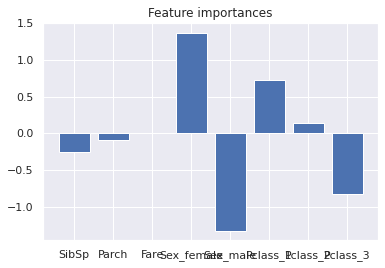

In [ ]:
logisticRegression = LogisticRegression()
compute_score(logisticRegression, X, y)
plot_var_weights_logistic_regression(X, y)

Age has very few impact

**Exercise**

Use `plot_hist` method on `Age` and then define a new feature `is_child` when `Age` is less than some threshold. Does it improve the model's score ?

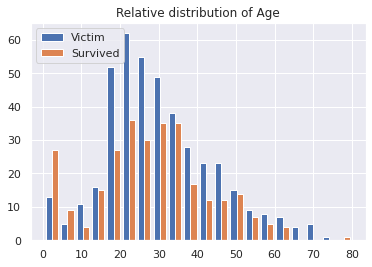

In [ ]:
#### CODE HERE ####
plot_hist('Age')

In [ ]:
#### CODE HERE ####
def create_is_child(X):  
  target = X.Survived
  
  class_dummies = pd.get_dummies(X['Sex'], prefix = 'Sex')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
  X = X.join(class_dummies)
  mean = np.mean(X.Age)
  X['Age'] = X['Age'].replace(np.nan, mean)
  X['is_child'] = X['Age'].between(0,10)
  X['is_child'] = X['is_child'].astype('Int64')
  to_delete = ['Name', 'Sex','Age', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Pclass']
  for column in to_delete:
    del X[column]
  return X, target



In [ ]:
X,y = create_is_child(df.copy())
X.head(10)

,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,is_child
PassengerId,,,,,,,,,
1,1,0,7.2500,0,1,0,0,1,0
2,1,0,71.2833,1,0,1,0,0,0
3,0,0,7.9250,1,0,0,0,1,0
4,1,0,53.1000,1,0,1,0,0,0
5,0,0,8.0500,0,1,0,0,1,0
6,0,0,8.4583,0,1,0,0,1,0
7,0,0,51.8625,0,1,1,0,0,0
8,3,1,21.0750,0,1,0,0,1,1
9,0,2,11.1333,1,0,0,0,1,0


In [ ]:
logisticRegression = LogisticRegression()
compute_score(logisticRegression, X, y)

0.8035830212234707

{
  "SibSp": -0.414842975828101,
  "Parch": -0.23606731508537218,
  "Fare": 0.005062408840367134,
  "Sex_female": 1.3988547228999844,
  "Sex_male": -1.3691558550832428,
  "Pclass_1": 0.7849165308701183,
  "Pclass_2": 0.09331036318761483,
  "Pclass_3": -0.8485280262410089,
  "is_child": 1.8689602405698114
}


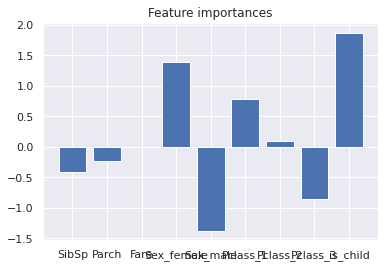

In [ ]:
plot_var_weights_logistic_regression(X, y)



**Conclusion**

What we just did with the new feature `is_child` is add non-linearity that a linear model like Logistic Regression can't capture without our help.

Let's try non-linear models. **However, remember that creating new features manually is still the best method to get the best results and performances out of models.**

**Exercise : Random Forest to the rescue**

Use a Random Forest classifier with the features we defined above but do not use `is_child` yet.

In [ ]:
#### CODE HERE ####
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
X, y = parse_model_1(df.copy())
print("parse_model_1 score is {0:5.4f}".format(compute_score(rfc, X, y)))
X, y = parse_model_2(df.copy())
print("parse_model_2 score is {0:5.4f}".format(compute_score(rfc, X, y)))
X, y = parse_model_2_bis(df.copy())
print("parse_model_2_bis score is {0:5.4f}".format(compute_score(rfc, X, y)))


parse_model_1 score is 0.7015
parse_model_2 score is 0.8025
parse_model_2_bis score is 0.8160


As you may know, when using Decision Tree, we no longer have the weights of variables which is not ideal and hurts our model's interpretability.

However we can use a feature importances method that comes with Random Forst classifiers in sklearn. It computes the relative importance of features. This method should be added to your toolbox, it will allow you to somewhat interpret the results of your Random Forest.

**Exercise**

Compute feature importances of your Random Classifier model and interpret the results. How does it compare to the linear model ? Do both models select the same features as important ? Why ?

You can find documentation here https://mljar.com/blog/feature-importance-in-random-forest/

In [ ]:
import json

def plot_var_weights_RFC(X, y):
  RFC = RandomForestClassifier()
  RFC.fit(X, y)

  columns = np.array(X.columns)
  weights = np.array(RFC.feature_importances_)

  # weights dictonary sorted by absolute value
  weights_dict = dict(zip(columns, weights))
  print(json.dumps(weights_dict, indent = 2))

  # plot the weights
  plt.bar(columns, weights)
  plt.title('Feature importances')
  plt.show()

{
  "SibSp": 0.08217143426770063,
  "Parch": 0.08821599035388861,
  "Fare": 0.6901791983517863,
  "Pclass_1": 0.04353550523104838,
  "Pclass_2": 0.01679087742906695,
  "Pclass_3": 0.07910699436650913
}


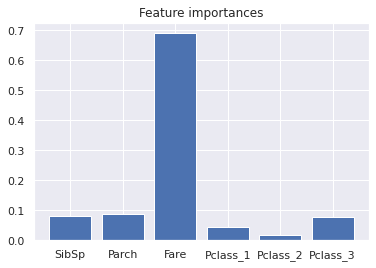

{
  "SibSp": 0.05794025849054833,
  "Parch": 0.05832315575965751,
  "Fare": 0.42406468541431314,
  "Sex_female": 0.1638152407322898,
  "Sex_male": 0.18415692449623575,
  "Pclass_1": 0.030039012947864673,
  "Pclass_2": 0.017768897731053446,
  "Pclass_3": 0.06389182442803742
}


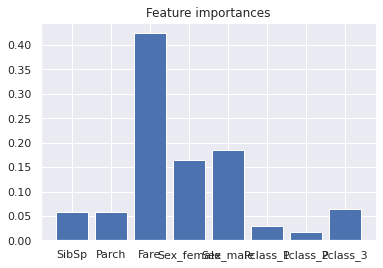

{
  "Age": 0.26449396456248314,
  "SibSp": 0.047360792495052,
  "Parch": 0.03293208804653561,
  "Fare": 0.26591351275002206,
  "Sex_female": 0.14935086693369973,
  "Sex_male": 0.14290707811761372,
  "Pclass_1": 0.029154061954459333,
  "Pclass_2": 0.015420858358930322,
  "Pclass_3": 0.05246677678120403
}


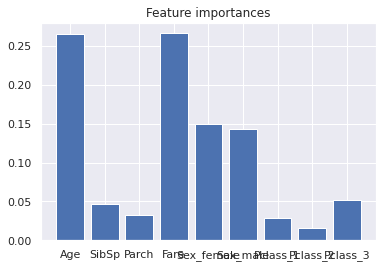

In [ ]:
X, y = parse_model_1(df.copy())
plot_var_weights_RFC(X, y)
X, y = parse_model_2(df.copy())
plot_var_weights_RFC(X, y)
X, y = parse_model_2_bis(df.copy())
plot_var_weights_RFC(X, y)

**Open ended question**

Use other variables using techniques we have seen in the course and some creativity on existing variables.

Do EDA on variables to argument your choices, use plots, correlation etc...


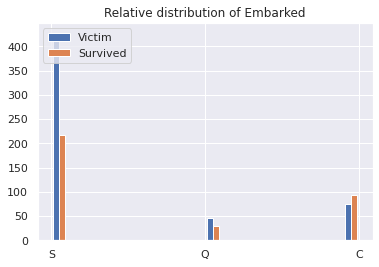

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
#### CODE HERE ####
plot_hist('Embarked')
df

In [ ]:
def parse_model_3(X):  
  target = X.Survived
  #female = df[df.Sex == 'female']
  #male = df[df.Sex == 'male']
  class_dummies = pd.get_dummies(X['Sex'], prefix = 'Sex')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Embarked'], prefix = 'Embarked')
  X = X.join(class_dummies)
  mean = np.mean(X.Age)
  X['Age'] = X['Age'].replace(np.nan, mean)
  to_delete = ['Name', 'Sex', 'Cabin','Embarked', 'Survived', 'Ticket', 'Pclass']
  for column in to_delete:
    del X[column]
  return X, target

X,y = parse_model_3(df.copy())
X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
2,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
3,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
4,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1
5,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1
888,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1
889,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1


In [ ]:
X,y = parse_model_2_bis(df.copy())
X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
1,22.000000,1,0,7.2500,0,1,0,0,1
2,38.000000,1,0,71.2833,1,0,1,0,0
3,26.000000,0,0,7.9250,1,0,0,0,1
4,35.000000,1,0,53.1000,1,0,1,0,0
5,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,27.000000,0,0,13.0000,0,1,0,1,0
888,19.000000,0,0,30.0000,1,0,1,0,0
889,29.699118,1,2,23.4500,1,0,0,0,1


                   Age  SibSp  Parch  ...  Pclass_1  Pclass_2  Pclass_3
PassengerId                           ...                              
1            22.000000      1      0  ...         0         0         1
2            38.000000      1      0  ...         1         0         0
3            26.000000      0      0  ...         0         0         1
4            35.000000      1      0  ...         1         0         0
5            35.000000      0      0  ...         0         0         1
...                ...    ...    ...  ...       ...       ...       ...
887          27.000000      0      0  ...         0         1         0
888          19.000000      0      0  ...         1         0         0
889          29.699118      1      2  ...         0         0         1
890          26.000000      0      0  ...         1         0         0
891          32.000000      0      0  ...         0         0         1

[891 rows x 9 columns]
parse_model_2_bis score is 0.8138
{
  "A

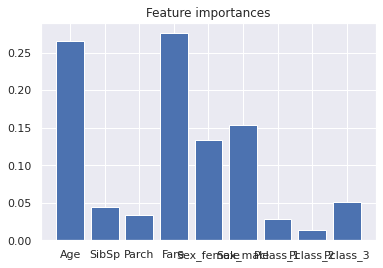

                   Age  SibSp  Parch  ...  Embarked_C  Embarked_Q  Embarked_S
PassengerId                           ...                                    
1            22.000000      1      0  ...           0           0           1
2            38.000000      1      0  ...           1           0           0
3            26.000000      0      0  ...           0           0           1
4            35.000000      1      0  ...           0           0           1
5            35.000000      0      0  ...           0           0           1
...                ...    ...    ...  ...         ...         ...         ...
887          27.000000      0      0  ...           0           0           1
888          19.000000      0      0  ...           0           0           1
889          29.699118      1      2  ...           0           0           1
890          26.000000      0      0  ...           1           0           0
891          32.000000      0      0  ...           0           

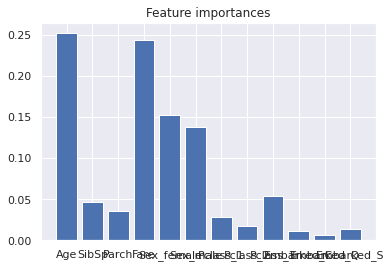

In [ ]:
rfc = RandomForestClassifier()
X, y = parse_model_2_bis(df.copy())
print(X)
print("parse_model_2_bis score is {0:5.4f}".format(compute_score(rfc, X, y)))
plot_var_weights_RFC(X, y)
X, y = parse_model_3(df.copy())
print(X)
print("parse_model_3 score is {0:5.4f}".format(compute_score(rfc, X, y)))
plot_var_weights_RFC(X, y)

In [ ]:
def parse_model_4(X):  
  target = X.Survived
  #female = df[df.Sex == 'female']
  #male = df[df.Sex == 'male']
  class_dummies = pd.get_dummies(X['Sex'], prefix = 'Sex')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Embarked'], prefix = 'Embarked')
  X = X.join(class_dummies)
  X['CabinBoolean'] = pd.notna(X['Cabin']).astype('Int64')
  X['Cabin'] = X['Cabin'].replace(np.nan, False)
  X['Cabin'] = X['Cabin'].str[:1]
  class_dummies = pd.get_dummies(X['Cabin'], prefix = 'Cabin')
  X = X.join(class_dummies)
  mean = np.mean(X.Age)
  X['Age'] = X['Age'].replace(np.nan, mean)
  to_delete = ['Name', 'Sex', 'Cabin','Embarked', 'Survived', 'Ticket', 'Pclass']
  for column in to_delete:
    del X[column]
  return X, target

X,y = parse_model_4(df.copy())
X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,CabinBoolean,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
5,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
888,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
889,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
Df_test = df.copy()
Df_test['Title1'] = Df_test['Name'].apply(lambda name: name.split(' ')[1])
Df_test['Title1'].unique()


array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

Some of our titles are incorrect we must find a better way to isolate them

In [ ]:
Df_test = df.copy()
Df_test['Title1'] = Df_test['Name'].apply(lambda name: name.split(',')[1])
Df_test['Title2'] =  Df_test['Title1'].apply(lambda name: name.split(' ')[1])
Df_test['Title2'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [ ]:
def parse_model_5(X):  
  target = X.Survived
  #female = df[df.Sex == 'female']
  #male = df[df.Sex == 'male']
  class_dummies = pd.get_dummies(X['Sex'], prefix = 'Sex')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
  X = X.join(class_dummies)
  class_dummies = pd.get_dummies(X['Embarked'], prefix = 'Embarked')
  X = X.join(class_dummies)
  X['CabinBoolean'] = pd.notna(X['Cabin']).astype('Int64')
  X['Cabin'] = X['Cabin'].replace(np.nan, False)
  X['Cabin'] = X['Cabin'].str[:1]
  class_dummies = pd.get_dummies(X['Cabin'], prefix = 'Cabin')
  X = X.join(class_dummies)
  X['Title1'] = X['Name'].apply(lambda name: name.split(',')[1])
  X['Title'] = X['Title1'].apply(lambda name: name.split(' ')[1])
  class_dummies = pd.get_dummies(X['Title'], prefix = 'Title')
  X = X.join(class_dummies)
  mean = np.mean(X.Age)
  X['Age'] = X['Age'].replace(np.nan, mean)
  to_delete = ['Name', 'Sex', 'Cabin','Embarked', 'Survived', 'Ticket', 'Pclass','Title','Title1']
  for column in to_delete:
    del X[column]
  return X, target

X,y = parse_model_5(df.copy())
X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,CabinBoolean,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title_Capt.,Title_Col.,Title_Don.,Title_Dr.,Title_Jonkheer.,Title_Lady.,Title_Major.,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Title_the
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,35.000000,1,0,53.1000,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.000000,0,0,13.0000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
888,19.000000,0,0,30.0000,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
889,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


                   Age  SibSp  Parch  ...  Cabin_F  Cabin_G  Cabin_T
PassengerId                           ...                           
1            22.000000      1      0  ...        0        0        0
2            38.000000      1      0  ...        0        0        0
3            26.000000      0      0  ...        0        0        0
4            35.000000      1      0  ...        0        0        0
5            35.000000      0      0  ...        0        0        0
...                ...    ...    ...  ...      ...      ...      ...
887          27.000000      0      0  ...        0        0        0
888          19.000000      0      0  ...        0        0        0
889          29.699118      1      2  ...        0        0        0
890          26.000000      0      0  ...        0        0        0
891          32.000000      0      0  ...        0        0        0

[891 rows x 21 columns]
parse_model_4 score is 0.8137
{
  "Age": 0.2460434137252601,
  "SibSp": 0.0438

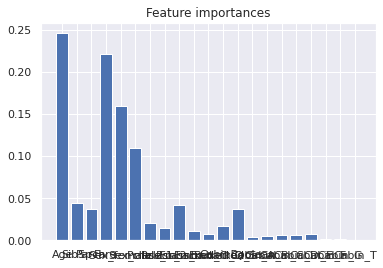

                   Age  SibSp  Parch  ...  Title_Rev.  Title_Sir.  Title_the
PassengerId                           ...                                   
1            22.000000      1      0  ...           0           0          0
2            38.000000      1      0  ...           0           0          0
3            26.000000      0      0  ...           0           0          0
4            35.000000      1      0  ...           0           0          0
5            35.000000      0      0  ...           0           0          0
...                ...    ...    ...  ...         ...         ...        ...
887          27.000000      0      0  ...           1           0          0
888          19.000000      0      0  ...           0           0          0
889          29.699118      1      2  ...           0           0          0
890          26.000000      0      0  ...           0           0          0
891          32.000000      0      0  ...           0           0          0

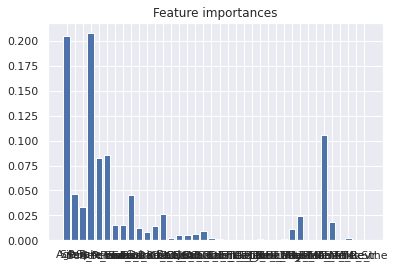

In [ ]:
rfc = RandomForestClassifier()
X, y = parse_model_4(df.copy())
print(X)
print("parse_model_4 score is {0:5.4f}".format(compute_score(rfc, X, y)))
plot_var_weights_RFC(X, y)
X, y = parse_model_5(df.copy())
print(X)
print("parse_model_5 score is {0:5.4f}".format(compute_score(rfc, X, y)))
plot_var_weights_RFC(X, y)

parse_model_2_bis score is 0.7946
{
  "Age": -0.03824025882891435,
  "SibSp": -0.3505928097481825,
  "Parch": -0.10132566595987902,
  "Fare": 0.003405956770454574,
  "Sex_female": 1.63959303676834,
  "Sex_male": -1.033696258634054,
  "Pclass_1": 1.205528179108605,
  "Pclass_2": 0.22958227952994625,
  "Pclass_3": -0.8292136805037884
}


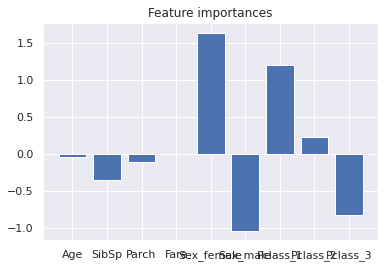

parse_model_3 score is 0.7991
{
  "Age": -0.03720769664197226,
  "SibSp": -0.32056249557748717,
  "Parch": -0.09216092014961934,
  "Fare": 0.0027169877843417137,
  "Sex_female": 1.6500192019537776,
  "Sex_male": -1.0100899917708457,
  "Pclass_1": 1.1858150086280623,
  "Pclass_2": 0.31413319150880187,
  "Pclass_3": -0.8600189899540852,
  "Embarked_C": 0.35673031088570106,
  "Embarked_Q": 0.2949665552246748,
  "Embarked_S": -0.0716562376287938
}


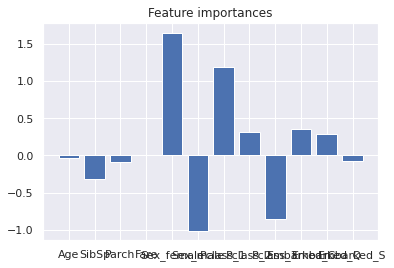

In [ ]:
LR = LogisticRegression()
X, y = parse_model_2_bis(df.copy())
print("parse_model_2_bis score is {0:5.4f}".format(compute_score(LR, X, y)))
plot_var_weights_logistic_regression(X, y)
X, y = parse_model_3(df.copy())
print("parse_model_3 score is {0:5.4f}".format(compute_score(LR, X, y)))
plot_var_weights_logistic_regression(X, y)

parse_model_4 score is 0.8047
{
  "Age": -0.03879360845833889,
  "SibSp": -0.31433497363685975,
  "Parch": -0.10473068965195091,
  "Fare": 0.0033926261959946464,
  "Sex_female": 1.5852022428117931,
  "Sex_male": -1.0490269721401762,
  "Pclass_1": 0.6914972053720212,
  "Pclass_2": 0.5038855261581001,
  "Pclass_3": -0.6592074608584715,
  "Embarked_C": 0.31542739910235684,
  "Embarked_Q": 0.31882550285055206,
  "Embarked_S": -0.15639861845491432,
  "CabinBoolean": 0.8102854308512999,
  "Cabin_A": 0.05807743538477615,
  "Cabin_B": 0.09785173045569777,
  "Cabin_C": -0.4255319757720296,
  "Cabin_D": 0.4217540148726231,
  "Cabin_E": 0.7764072836971645,
  "Cabin_F": 0.18369607470282814,
  "Cabin_G": -0.22859883173674928,
  "Cabin_T": -0.07337030075299847
}


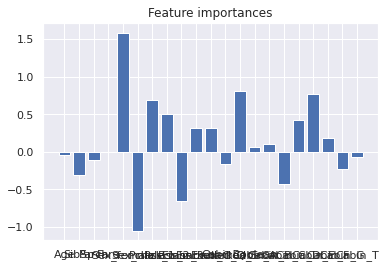

                   Age  SibSp  Parch  ...  Title_Rev.  Title_Sir.  Title_the
PassengerId                           ...                                   
1            22.000000      1      0  ...           0           0          0
2            38.000000      1      0  ...           0           0          0
3            26.000000      0      0  ...           0           0          0
4            35.000000      1      0  ...           0           0          0
5            35.000000      0      0  ...           0           0          0
...                ...    ...    ...  ...         ...         ...        ...
887          27.000000      0      0  ...           1           0          0
888          19.000000      0      0  ...           0           0          0
889          29.699118      1      2  ...           0           0          0
890          26.000000      0      0  ...           0           0          0
891          32.000000      0      0  ...           0           0          0

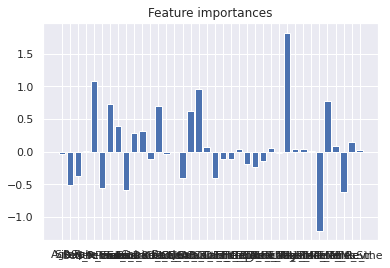

0.8316604244694134

In [ ]:

X, y = parse_model_4(df.copy())
print("parse_model_4 score is {0:5.4f}".format(compute_score(LR, X, y)))
plot_var_weights_logistic_regression(X, y)
X, y = parse_model_5(df.copy())
print(X)
print("parse_model_5 score is {0:5.4f}".format(compute_score(LR, X, y)))
plot_var_weights_logistic_regression(X, y)
compute_score(logisticRegression, X, y)

In [ ]:
df.groupby(df['Ticket']).count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,
110152,3,3,3,3,3,3,3,3,3,3
110413,3,3,3,3,3,3,3,3,3,3
110465,2,2,2,2,1,2,2,2,2,2
110564,1,1,1,1,1,1,1,1,1,1
110813,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
W./C. 6608,4,4,4,4,4,4,4,4,0,4
W./C. 6609,1,1,1,1,0,1,1,1,0,1
W.E.P. 5734,1,1,1,1,1,1,1,1,1,1
